In [2]:
import math
import struct
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class Data:
    dim = -1
    data = []
    markers = []

    def __init__(self, dim):
        self.dim = dim
        self.data = [[] for x in range(dim)]
        self.markers = []
                
    def axis(self, index):
        return self.data[index]
    
    def axisM(self, index, marker):
        result = []
        for i in range(0, len(self.data[index])):
            if (self.markers[i] == marker):
                result.append(self.data[index][i])
        
        return result
    
    def addPoint(self, dim, data):
        self.data[dim].append(data)
        
    def addMarker(self, marker):
        self.markers.append(marker)
        
    def sortByEigenValues(self, eVal):
        for i in range(len(self.data)):
            for j in range(i, len(self.data)):
                if (eVal[i] < eVal[j]):
                    (eVal[i], eVal[j]) = (eVal[j], eVal[i])
                    (self.data[i], self.data[j]) = (self.data[j], self.data[i])
    
        
        
def cloneData(ref) -> Data:
    data = Data(len(ref.data))
    data.data = ref.data
    data.markers = ref.markers
    return data

def draw3d(data, x, y, z, zdir, markers = []):
    colors = ['red', 'green', 'blue', 'orange', 'black', 'yellow']
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    for i in range(0, len(markers)):
        ax.scatter(
            data.axisM(x, markers[i]), 
            data.axisM(y, markers[i]), 
            data.axisM(z, markers[i]), 
            zdir=zdir, s=30, c=colors[i], 
            depthshade=True)
    
def draw2d(data, x, y, markers = []):
    colors = ['red', 'green', 'blue', 'orange', 'black', 'yellow']
    for i in range(0, len(markers)):
        plt.scatter(data.axisM(x, markers[i]), data.axisM(y, markers[i]), c = colors[i])
    
def drawLine(dots):
    plt.plot(range(0, len(dots)), dots)

In [3]:
#int-dim int-число_точек double-X1 ... double-Xdim int-attr ... double-X1 ... double-Xdim int-attr  
def loadData() -> Data:
    with open("data/ocr-12.dat", "rb") as f:
        dim = struct.unpack('=i', f.read(4))[0] # размерность
        count = struct.unpack('=i', f.read(4))[0] # количество точек
        count = 100
        
        data = Data(dim)
        
        print('dimensionality:', dim)
        print('size:', count)
        
        for i in range(0, count): #count
            for d in range(0, dim):
                data.addPoint(d, struct.unpack('@d', f.read(8))[0])
                
            data.addMarker(struct.unpack('=i', f.read(4))[0]) # пропускаем атрибут

    return data


def loadRings() -> Data:
    data = Data(3)
    
    maxN = 200
    dimN = 4
    
    i = 0
    while(i < maxN):
        n1 = 0
        while(n1 < dimN and i < maxN):
            n1 += 1
            n2 = 0
            while(n2 < n1 and i < maxN):
                n2 += 1
                f = 6.2831 * (i/(dimN*(dimN-1)/2))/(maxN/(dimN*(dimN-1)/2))
                
                data.addPoint(0, 15.0 + 10.0 * math.sin(f))
                data.addPoint(1, 15.0 + 10.0 * math.cos(f))
                data.addPoint(2, 0) 
                data.addMarker(0 if i < 150 else 1)
                i += 1
                
    return data

In [4]:
data = loadData()
#data = loadRings()

dimensionality: 12
size: 100


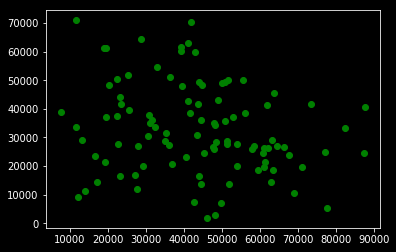

In [5]:
#draw3d(data, 0, 1, 2, 'z', [2, 1])
draw2d(data, 0, 1, [1, 2])

In [6]:
#Считаем ковариационную матрицу
cdata = cloneData(data)

covMat = np.cov(cdata.data)
#print ("\nКовариационная матрица:")
#print (covMat)

In [7]:
#Находим собственные значения и вектора
eVal, eVec = np.linalg.eig(covMat)

#print('\nСобственные значения:\n', eVal)
#print ("\nСобственные вектора:\n", eVec)

In [8]:
#Проекция
eVecTuple = ()

for i in range(0, cdata.dim):
    eVecTuple += (eVec[:,i],)
    
cdata.data = np.dot(np.vstack(eVecTuple), cdata.data)

Объем сохраняемой информации:
Проекция 0 : 15.5703
Проекция 1 : 11.7317
Проекция 2 : 11.4514
Проекция 3 : 9.9171
Проекция 4 : 9.3058
Проекция 5 : 8.3983
Проекция 6 : 7.6174
Проекция 7 : 7.3656
Проекция 8 : 5.6037
Проекция 9 : 5.3548
Проекция 10 : 4.0651
Проекция 11 : 3.6187


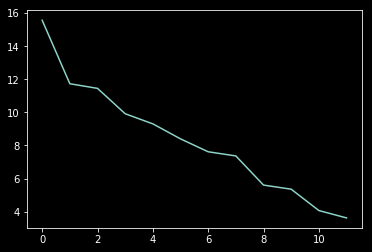

In [9]:
# находим сумму дисперсий по каждой из осей
dsum = 0
dlist = []
for i in range(0, cdata.dim):
    disp = abs(cdata.axis(i).max() - cdata.axis(i).min())
    dsum += disp
    dlist.append(disp)
     
cdata.sortByEigenValues(dlist)

dlist = dlist/dsum*100
print ("Объем сохраняемой информации:")
for i in range(0, cdata.dim):
    print ("Проекция", i, ": %.4f" % (dlist[i]))
    
drawLine(dlist)

Проекция 0 : 1.7679
Проекция 1 : 1.2231
Проекция 2 : 0.9383
Проекция 3 : 0.7446
Проекция 4 : 0.6035
Проекция 5 : 0.4903
Проекция 6 : 0.4648
Проекция 7 : 0.4334
Проекция 8 : 0.3828
Проекция 9 : 0.3389
Проекция 10 : 0.2345
Проекция 11 : 0.0000


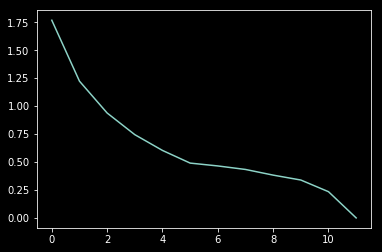

In [10]:
# Квадрат относительной ошибки - отношение остаточной дисперсии к объясненной 
errList1 = []
for i in range(0, cdata.dim):
    err = math.sqrt(abs(eVal[i + 1:].sum()/eVal[:i + 1].sum()))
    errList1.append(err)
    print ("Проекция", i, ": %.4f" % (err))

drawLine(errList1)

Проекция 1 : 0.8704
Проекция 2 : 0.7742
Проекция 3 : 0.6842
Проекция 4 : 0.5972
Проекция 5 : 0.5167
Проекция 6 : 0.4402
Проекция 7 : 0.4215
Проекция 8 : 0.3976
Проекция 9 : 0.3575
Проекция 10 : 0.3209
Проекция 11 : 0.2283


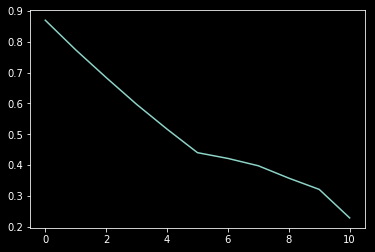

In [11]:
# тоже самое, но без необходимости вычислять все собсвенные значения
covSum = 0 # сумма элементов по диагонали = сумме собственных значений
for i in range(0,cdata.dim):
    covSum += covMat[i,i]
    
errList2 = []    
for i in range(0,cdata.dim):
    val = 1/covSum * (covSum - eVal[:i+1].sum())
    if val < 0 : continue 
    
    err = math.sqrt(val)
    errList2.append(err)
    print ("Проекция", i+1, ": %.4f" % (err))
    
drawLine(errList2)

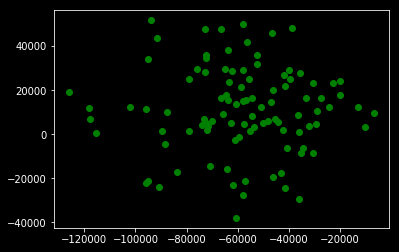

In [12]:
draw2d(cdata, 0, 1, [1, 2])